# Лабораторная работа №4
## Выполнил студент группы БВТ2005 Камышев Владимир

Реализовать следующие структуры данных:
  
● <b> Стек (stack): </b>  
Операции для стека: 
<i> инициализация, проверка на пустоту, добавление нового элемента в начало, извлечение элемента из начала;  </i>  
  
● <b> Дек (двусторонняя очередь, deque):  </b>  
Операции для дека: 
<i> инициализация, проверка на пустоту, добавление нового элемента в начало, добавление нового элемента в конец, извлечение элемента из начала, извлечение элемента из конца. </i>  
  
<i> Разработать программу обработки данных, содержащихся в заранее подготовленном txt-файле, в соответствии с заданиями, применив указанную в задании структуру данных. Результат работы программы вывести на экран и сохранить в отдельном txt-файле. </i>

# Задание №1
Отсортировать строки файла, содержащие названия книг, в алфавитном порядке с использованием двух деков.
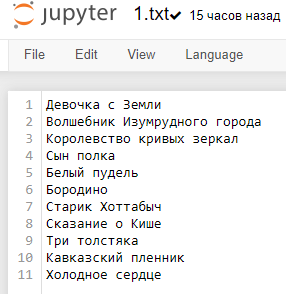

In [7]:


class Deque:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addRear(self, item):
        self.items.append(item)

    def addFront(self, item):
        self.items.insert(0, item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)

deque1 = Deque()
deque2 = Deque()

def alph_sort(data):
    deque1.addRear(data[0])
    for i in range(1, len(data)):
        temp1 = deque1.removeRear()
        if data[i] <= temp1:
            deque1.addRear(temp1)
            deque1.addRear(data[i])
            continue
        deque1.addRear(temp1)
        temp2 = deque1.removeFront()
        if data[i] >= temp2:
            deque1.addRear(temp2)
            deque1.addRear(data[i])
            continue
        deque1.addRear(temp2)
        temp = deque1.removeRear()
        while data[i] >= temp:
            deque2.addRear(temp)
            temp = deque1.removeRear()
        deque1.addRear(temp)
        deque1.addRear(data[i])
        while deque2.isEmpty() is False:
            deque1.addRear(deque2.removeFront())
    return deque1.items
    
with open("1.txt", 'r', encoding = "utf-8") as file, open("1.1.txt", 'w', encoding = "utf-8") as ofile:
    temp = []
    for line in file:
        temp.append(line)
    temp[-1] += "\n"
    result = alph_sort(temp)
    ofile.writelines(result)

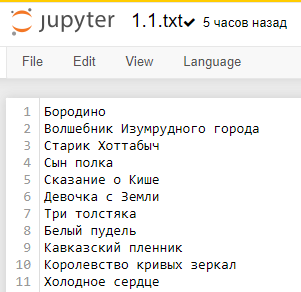

### Задание №2
Дек содержит последовательность символов для шифровки сообщений. Дан текстовый файл, содержащий зашифрованное сообщение. Пользуясь деком, расшифровать текст. 
Известно, что при шифровке каждый символ сообщения заменялся следующим за ним в деке по часовой стрелке через один.

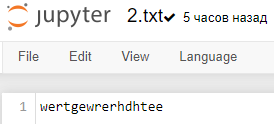

In [114]:
class Deque:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addRear(self, item):
        self.items.append(item)
        
    def removeRear(self):
        return self.items.pop(0)
    
def create_stack():
    stack = []
    return stack

alph = create_stack()
alph = ['а', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
deque = Deque()
def decode(data):
    for i in data:
            temp = alph.index(i)
            y = alph[temp-2]
            deque.addRear(y)
    return deque.items

with open("2.txt", 'r', encoding = "utf-8") as file, open("2.1.txt", 'w', encoding = "utf-8") as ofile:
    temp = []
    for line in file:
        for x in line:
            temp.append(x)
    result = decode(temp)
    ofile.writelines(result)

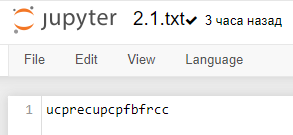

### Задание №3
Даны три стержня и n дисков различного размера. Диски можно надевать на стержни, образуя из них башни. Перенести n дисков со стержня А на стержень С, сохранив их первоначальный порядок. При переносе дисков необходимо соблюдать следующие правила:
- на каждом шаге со стержня на стержень переносить только один диск;
- диск нельзя помещать на диск меньшего размера;
- для промежуточного хранения можно использовать стержень В.
Реализовать алгоритм, используя три стека вместо стержней А, В, С. Информация о дисках хранится в исходном файле.

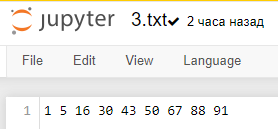

In [122]:
def create_stack():
    stack = []
    return stack

rod1 = create_stack()
rod2 = create_stack()
rod3 = create_stack()

rods = {1:rod1, 2:rod2, 3:rod3}

def solve(n, i, k):
    if n == 1:
        rods[k].append(rods[i].pop())
    else:
        solve(n - 1, i, 6 - i - k)
        rods[k].append(rods[i].pop())
        solve(n - 1, 6 - i - k, k)

with open("3.txt", 'r', encoding = "utf-8") as file, open("3.1.txt", 'w', encoding = "utf-8") as ofile:
    for line in file:
        data = line.split(" ")
    rods[1] = create_stack()
    rods[1] = data
    solve(len(rods[1]), 1, 3)
    ofile.write(" ".join(rods[3]))
    

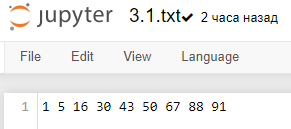

### Задание №4
Дан текстовый файл с программой на алгоритмическом языке. За один просмотр файла проверить баланс круглых скобок в тексте, используя стек.

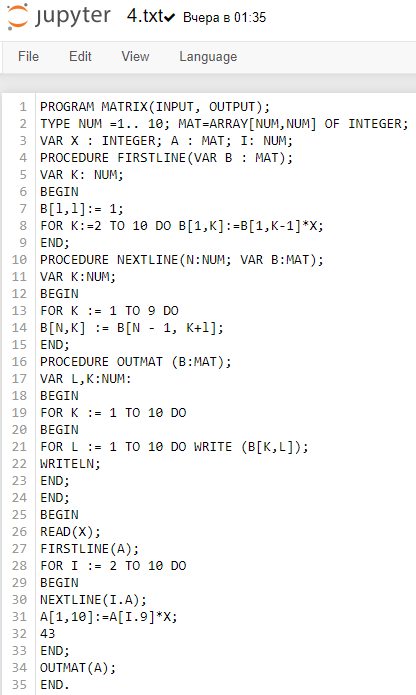

In [7]:
def create_stack():
    stack = []
    return stack

def check_empty(stack):
    return len(stack) == 0

def parentheses_check():
    with open("4.txt", 'r', encoding = "utf-8") as file:
        stack = create_stack()
        for line in file:
            for i in line:
                if i == '(':
                    stack.append(i)
                elif i == ')':
                    if check_empty(stack):
                        return False
                    else:
                        stack.pop()
    if check_empty(stack):
        return True
    else:
        return False

print(parentheses_check())

True


### Задание №5
Дан текстовый файл с программой на алгоритмическом языке. За один просмотр файла проверить баланс квадратных скобок в тексте, используя дек.

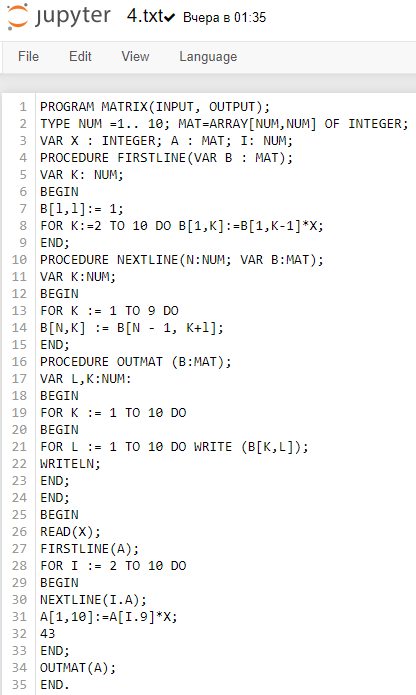

In [10]:
class Deque:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addRear(self, item):
        self.items.append(item)
        
    def removeRear(self):
        return self.items.pop(0)

def brackets_check():
    with open("4.txt", 'r', encoding = "utf-8") as file:
        deque = Deque()
        for line in file:
            for i in line:
                if i == '[':
                    deque.addRear(i)
                elif i == ']':
                    if deque.isEmpty():
                        return False
                    else:
                        deque.removeRear()
    if deque.isEmpty():
        return True
    else:
        return False
    
print(brackets_check())

True


### Задание №6
Дан файл из символов. Используя стек, за один просмотр файла напечатать сначала все цифры, затем все буквы, и, наконец, все остальные символы, сохраняя исходный порядок в каждой группе символов.

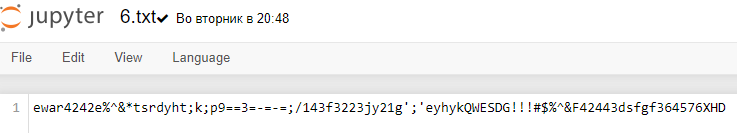

In [34]:
def create_stack():
    stack = []
    return stack

temp1 = ""
temp2 = ""
temp3 = ""

numbers = create_stack()
letters = create_stack()
symbols = create_stack()

with open("6.txt", 'r', encoding = "utf-8") as file, open("6.1.txt", 'w', encoding = "utf-8") as ofile:
    for line in file:
        for i in line:
            if i.isdigit():
                numbers.append(i)
            elif i.isalpha():
                letters.append(i)
            else:
                symbols.append(i)
                
    while len(numbers) > 0:
        temp1 += numbers.pop()
    while len(letters) > 0:
        temp2 += letters.pop()
    while len(symbols) > 0:
        temp3 += symbols.pop()
    ofile.write(temp1 + temp2 + temp3)

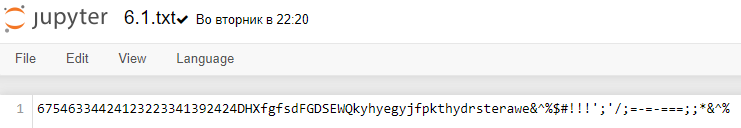

### Задание №7
Дан файл из целых чисел. Используя дек, за один просмотр файла напечатать сначала все отрицательные числа, затем все положительные числа, сохраняя исходный порядок в каждой группе.

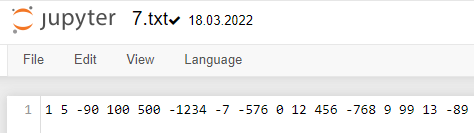

In [1]:
class Deque:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addRear(self, item):
        self.items.append(item)

    def addFront(self, item):
        self.items.insert(0, item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)

deque = Deque()

with open("7.txt", 'r', encoding = "utf-8") as file, open("7.1.txt", 'w', encoding = "utf-8") as ofile:
    for line in file:
        temp = line.split(" ")
        for i in temp:
            if int(i) >= 0:
                deque.addRear(int(i))
            else:
                deque.addFront(int(i))  
        temp = ""
        while deque.isEmpty() is False:
            temp += str(deque.removeRear()) + " "
        ofile.write(temp)

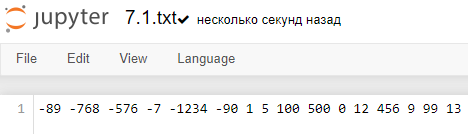

### Задание №8
Дан текстовый файл. Используя стек, сформировать новый текстовый файл, содержащий строки исходного файла, записанные в обратном порядке: первая строка становится последней, вторая – предпоследней и т.д.

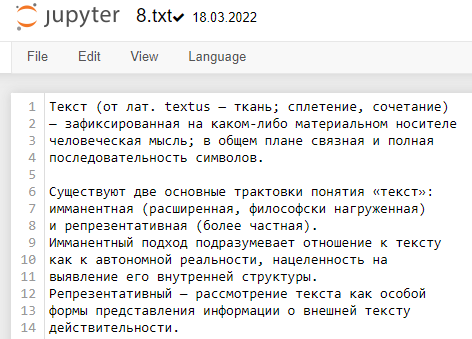

In [9]:
def create_stack():
    stack = []
    return stack

stack = create_stack()

with open("8.txt", 'r', encoding = "utf-8") as file, open("8.1.txt", 'w', encoding = "utf-8") as ofile:
    for line in file.readlines():
        stack.append(line.strip())
    while len(stack) > 0:
        print(stack.pop(), file=ofile)


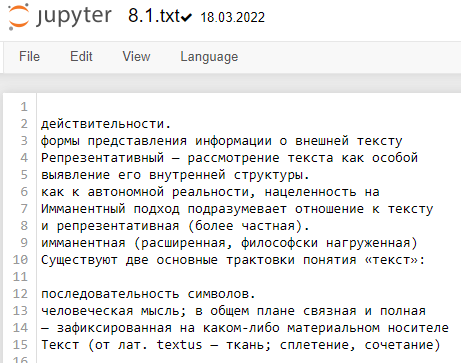

### Вывод
